# Associação de variáveis quantitativas

Considere duas variáveis quantitativas $x, y \in \mathbb{R}$ em uma amostra de tamanho $n$, o seu conjunto de dados bivariado é dado por $S = \{(x_{1}, y_{1}), (x_{2}, y_{2}), ..., (x_{n}, y_{n})\}$.

## Dados

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [21]:
df = pd.read_csv('../data/covid_cidades.csv', sep=',')
df.head()

,date,state,city,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants,death_rate
0,2020-12-29,AP,Amapá,956,6,9109.0,10406.00849,0.0063
1,2020-12-29,AP,Calçoene,1436,7,11117.0,12701.22059,0.0049
2,2020-12-29,AP,Cutias,741,2,5983.0,12145.54991,0.0027
3,2020-12-29,AP,Ferreira Gomes,930,5,7780.0,11673.15175,0.0054
4,2020-12-29,AP,Itaubal,345,0,5503.0,6142.06872,0.0000


In [22]:
x = df['confirmed']
y = df['deaths']

## Gráfico de dispersão

O gráfico de dispersão (*scatter plot*) do conjunto bivariado $S$ é dado pelo gráfico cartesiano dos pares $(x_{i}, y_{i})$ para $i = 1, ..., n$.

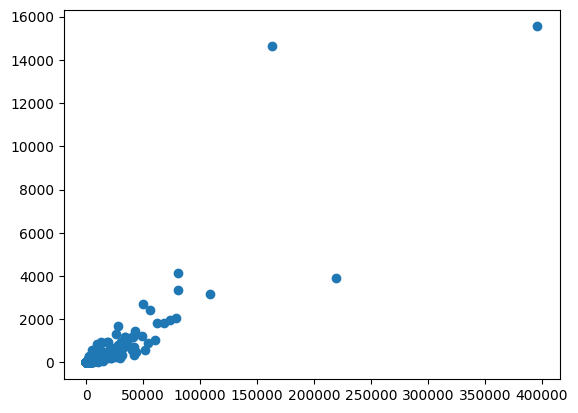

In [23]:
plt.scatter(x, y)

## Covariância e Coeficiente de correlação

A **covariância** entre $x$ e $y$ é a medida da variação conjunta de $x$ e $y$ em relação as suas médias $\bar{x}$ e $\bar{y}$. É dada por:

$$cov(x, y) = \frac{1}{n-1} \sum \limits _{i=0} ^{n} (x_{i} - \bar{x})(y_{i} - \bar{y})$$ 

onde $-\infty < cov(x, y) < \infty$.

**Observações:**
- $cov(x, y) = cov(y, x)$
- $cov(x, x) = s_{x}^{2}$

O **coeficiente de correlação** linear de Pearson $r$ é dado por:

$$cor(x, y) = r = \frac{cov(x, y)}{s_{x} s_{y}}$$

sendo que $s_{x}$ e $s_{y}$ denotam os desvios padrão de $x$ e $y$ respectivamente. Se $s_{x} = 0$ e/ou $s_{y} = 0$, então $r$ não está definido.

**Propriedades:**
- $-1 \leq r \leq 1$
- $cor(x, x) = 1$
- $r = 1$ se, e somente se, a relação entre $x$ e $y$ for linear $(y = a + bx)$ e $b > 0$.
- $r = -1$ se, e somente se, a relação entre $x$ e $y$ for linear $(y = a + bx)$ e $b < 0$.


In [24]:
# Covariância
np.cov(x, y)[0, 1] 

2242611.9052937566

In [25]:
# Coeficiente de correlação linear
np.corrcoef(x, y)[0, 1]

0.8889042001825198

## Regressão linear

Queremos obter a melhor reta para explicar a (possível) relação linear entre $x$ e $y$. Iremos ajustar o melhor modelo do tipo:

$$y_{i} = \alpha + \beta x_{i} + \epsilon _{i}$$

para isso, pode-se minimizar a soma quadrática dos erros:

$$ Q = \sum \limits _{i=1} ^{n} \epsilon _{i} ^{2}$$

Os estimadores de mínimos quadrados de $\alpha$ e $\beta$ é dado por:

$$\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}$$

$$\hat{\beta} = \frac{cov(x, y)}{var(x)}$$

In [34]:
beta = np.cov(x, y)[0, 1] / x.var()
alpha = x.mean() - beta
beta, alpha

(0.03657033904554102, 1350.5069628979486)

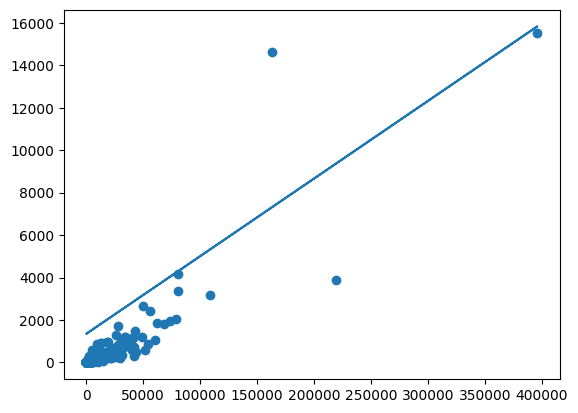

In [37]:
plt.scatter(x, y)
plt.plot(x, alpha + beta*x)
plt.show()